<a href="https://colab.research.google.com/github/Blatm/rating/blob/main/ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Blatm/rating.git

Cloning into 'rating'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 39 (delta 15), reused 26 (delta 8), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from rating import *

In [3]:
data_file = 'rating/data/lichess/lichess_db_standard_rated_2013-01.pgn'

data = lichess_pgn_to_data(data_file)
data = get_cleaned_elos_and_results(data)
rating_diff = make_diff_data(data)
winrate = make_winrate_data(rating_diff)

In [4]:
wr = np.zeros((503,3))
wr[:,0] = np.arange(-1255,1255+5,5)
for r in winrate:
  idx = np.where(wr[:,0] == r)[0][0]
  wr[idx,1:] = np.array(winrate[r])

(0.0, 1.01)

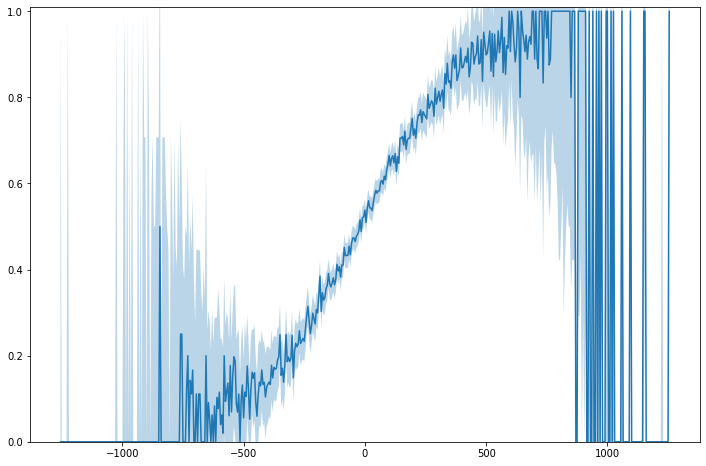

In [5]:
plt.figure(figsize=(12,8))
plt.plot(wr[:,0],wr[:,1])
plt.fill_between(wr[:,0],wr[:,1]-wr[:,2],wr[:,1]+wr[:,2],alpha=0.3)
plt.ylim(0,1.01)

In [6]:
triples = file_to_nonempty_triples(data_file)

In [90]:
pqr =[]
# pr = []

In [91]:
for x in triples.values():
  pvsq = x[0]['player1_winrate']
  pvsr = x[1]['player1_winrate']
  qvsr = x[2]['player1_winrate']

  pqr.append([pvsq,qvsr,pvsr])
pqr = np.array(pqr)

In [92]:
np.random.seed(13247)
np.random.shuffle(pqr)

In [94]:
pqr_train = pqr[:-50000,:2]
pr_train = pqr[:-50000,-1]

pqr_test = pqr[-50000:,:2]
pr_test = pqr[-50000:,-1]

In [144]:
pqr_train.shape

(205354, 2)

In [97]:
import keras.models as km
import keras.layers as kl
import keras.regularizers as kr
import tensorflow.keras.utils as ku

In [182]:
def get_model(input_size = 2, output_size = 1, d_rate = 0.4):

    """
    This function returns a simple Keras model, consisting of a
    re-implementation of the second_network.py neural network, with
    numnodes in the hidden layer, and dropout applied to the hidden
    layer.

    Inputs:
    - numnodes: int, the number of nodes in the hidden layer.

    - intput_size: int, the size of the input data, default = 784.

    - output_size: int, the number of nodes in the output layer,
      default = 10.

    - d_rate: float, fraction of nodes to be dropped out by the
      dropout procedure.

    Output: the constructed Keras model.

    """

    # Initialize the model.
    model = km.Sequential()

    # Add a hidden fully-connected layer.
    model.add(kl.Dense(2000, name = 'hidden1',
                       input_dim = input_size,
                       activation = 'relu'))

    # Add dropout to the hidden layer.
    # model.add(kl.Dropout(d_rate, name = 'dropout1'))

    # Add a hidden fully-connected layer.
    model.add(kl.Dense(2000, name = 'hidden2',
                       input_dim = input_size,
                       activation = 'relu'))
    

    # Add a hidden fully-connected layer.
    model.add(kl.Dense(2000, name = 'hidden3',
                       input_dim = input_size,
                       activation = 'relu'))

    # Add dropout to the hidden layer.
    # model.add(kl.Dropout(d_rate, name = 'dropout2'))

    # Add the output layer.
    model.add(kl.Dense(output_size, name = 'output',
                       activation = 'relu'))

    # Return the model.
    return model

In [183]:
model = get_model(d_rate=0.4)

In [184]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 2000)              6000      
_________________________________________________________________
hidden2 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
output (Dense)               (None, 1)                 2001      
Total params: 4,010,001
Trainable params: 4,010,001
Non-trainable params: 0
_________________________________________________________________


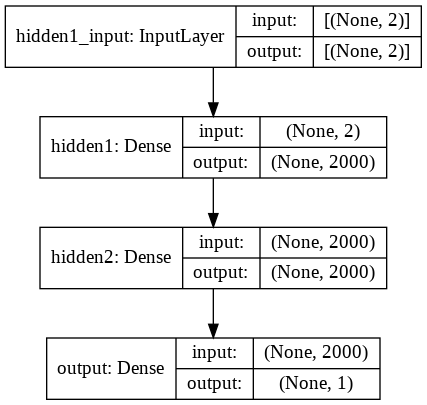

In [181]:
ku.plot_model(model, show_shapes=True, expand_nested=True)

In [178]:
model.compile(optimizer='adam', metrics = ['accuracy'], loss='mean_absolute_error')

In [173]:
fit = model.fit(pqr_train, pr_train, epochs=100, batch_size=1024, verbose=2)

Epoch 1/100
201/201 - 2s - loss: 0.1785 - accuracy: 0.3870
Epoch 2/100
201/201 - 1s - loss: 0.1742 - accuracy: 0.3894
Epoch 3/100
201/201 - 1s - loss: 0.1739 - accuracy: 0.3893
Epoch 4/100
201/201 - 1s - loss: 0.1738 - accuracy: 0.3894
Epoch 5/100
201/201 - 1s - loss: 0.1738 - accuracy: 0.3908
Epoch 6/100
201/201 - 1s - loss: 0.1740 - accuracy: 0.3888
Epoch 7/100
201/201 - 1s - loss: 0.1737 - accuracy: 0.3892
Epoch 8/100
201/201 - 1s - loss: 0.1738 - accuracy: 0.3900
Epoch 9/100
201/201 - 1s - loss: 0.1738 - accuracy: 0.3887
Epoch 10/100
201/201 - 1s - loss: 0.1737 - accuracy: 0.3894
Epoch 11/100
201/201 - 1s - loss: 0.1739 - accuracy: 0.3888
Epoch 12/100
201/201 - 1s - loss: 0.1737 - accuracy: 0.3886
Epoch 13/100
201/201 - 1s - loss: 0.1737 - accuracy: 0.3897
Epoch 14/100
201/201 - 1s - loss: 0.1737 - accuracy: 0.3893
Epoch 15/100
201/201 - 1s - loss: 0.1736 - accuracy: 0.3908
Epoch 16/100
201/201 - 1s - loss: 0.1736 - accuracy: 0.3898
Epoch 17/100
201/201 - 1s - loss: 0.1737 - accura

Text(0, 0.5, 'Accuracy')

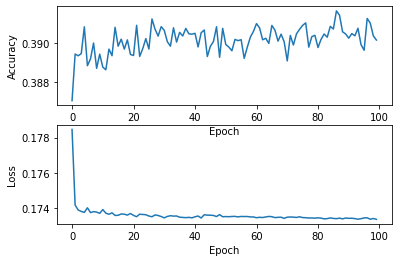

In [185]:
plt.figure()
plt.subplot(212)
plt.plot(fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(211)
plt.plot(fit.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [174]:
score = model.evaluate(pqr_test, pr_test)
score

1563/1563 [==============================] - 3s 2ms/step - loss: 0.1737 - accuracy: 0.3905


[0.17374923825263977, 0.3905400037765503]

In [175]:
model.predict([[.9,0.9]])

array([[0.62681866]], dtype=float32)

In [176]:
x = np.linspace(0,1,30)
y = np.linspace(0,1,30)
F = np.zeros((30,30))

for i,xi in enumerate(x):
  for j,yj in enumerate(y):
    F[i,j] = model.predict([[xi,yj]])[0][0]

x, y = np.meshgrid(x,y,indexing='ij')

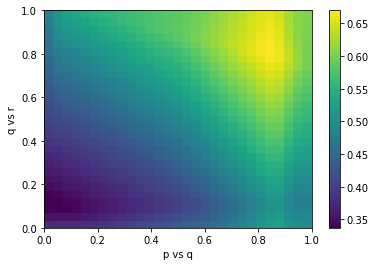

In [177]:
plt.figure()
plt.pcolormesh(x,y,F)
plt.xlabel('p vs q')
plt.ylabel('q vs r')

plt.colorbar()